In [1]:
%matplotlib inline

# Morphological operations

Morphology is the study of shapes. In image processing, some simple operations can get you a long way. The first things to learn are *erosion* and *dilation*. In erosion, we look at a pixel’s local neighborhood and replace the value of that pixel with the minimum value of that neighborhood. In dilation, we instead choose the maximum.

In [2]:
import numpy as np
from matplotlib import pyplot as plt, cm
import skdemo

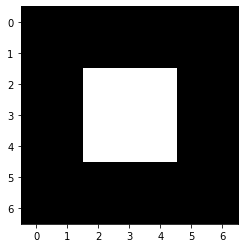

In [3]:
image = np.array([[0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)
plt.imshow(image);

The documentation for scikit-image's morphology module is
[here](http://scikit-image.org/docs/0.10.x/api/skimage.morphology.html).

Importantly, we must use a *structuring element*, which defines the local
neighborhood of each pixel. To get every neighbor (up, down, left, right, and
diagonals), use `morphology.square`; to avoid diagonals, use
`morphology.diamond`:

In [4]:
from skimage import morphology
sq = morphology.square(width=3)
dia = morphology.diamond(radius=1)
print(sq)
print(dia)

[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]


The central value of the structuring element represents the pixel being considered, and the surrounding values are the neighbors: a 1 value means that pixel counts as a neighbor, while a 0 value does not. So:

F:\New folder\files\Assignments\Semester 4\Miscellaneous\Anemoi Internship\Code\1_Python\5_Scipy\skdemo\_skdemo.py:85: MatplotlibDeprecationWarning: The 'shape' parameter of imshow() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'shape', they should be pass as keyword, not positionally.
  ax.imshow(img, **kwargs)


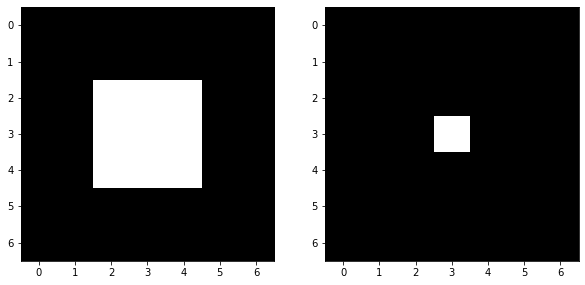

In [5]:
skdemo.imshow_all(image, morphology.erosion(image, sq), shape=(1, 2))

and

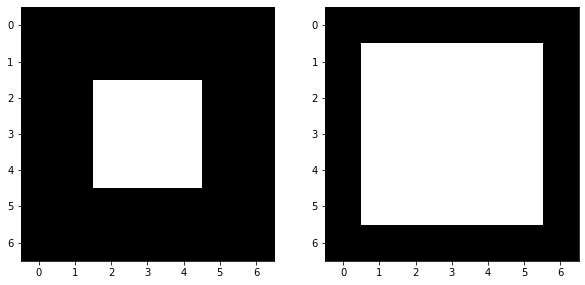

In [6]:
skdemo.imshow_all(image, morphology.dilation(image, sq))

and

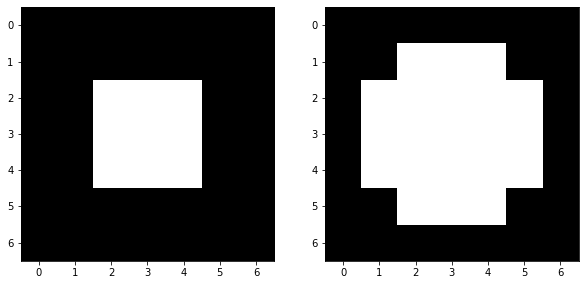

In [7]:
skdemo.imshow_all(image, morphology.dilation(image, dia))

Erosion and dilation can be combined into two slightly more sophisticated operations, *opening* and *closing*. Here's an example:

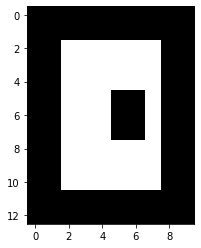

In [8]:
image = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], np.uint8)
plt.imshow(image);

What happens when run an erosion followed by a dilation of this image?

What about the reverse?

Try to imagine the operations in your head before trying them out below.

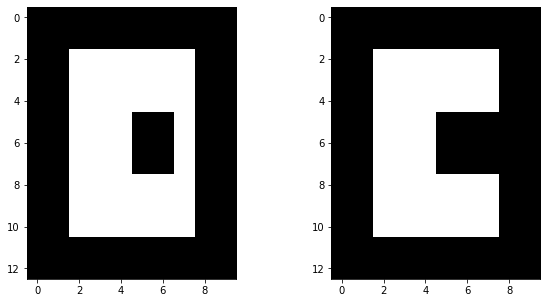

In [9]:
skdemo.imshow_all(image, morphology.opening(image, sq)) # erosion -> dilation

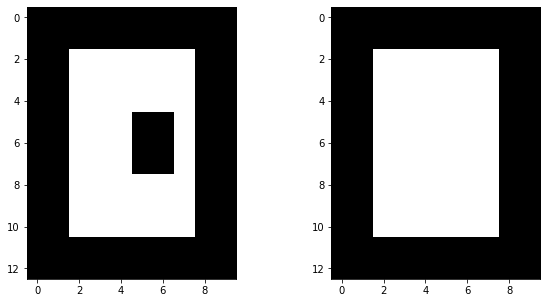

In [10]:
skdemo.imshow_all(image, morphology.closing(image, sq)) # dilation -> erosion

**Exercise**: use morphological operations to remove noise from a binary image.

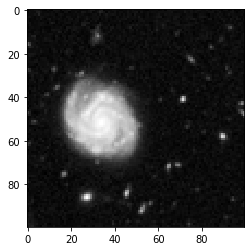

In [11]:
from skimage import data, color
hub = color.rgb2gray(data.hubble_deep_field()[350:450, 90:190])
plt.imshow(hub);

Remove the smaller objects to retrieve the large galaxy.